## Check Corroding

## Visualize the Results

In [77]:
import numpy as np

file_dir = "/Users/achs/PhD/code/CT-MRI_LandmarkDetection/Spartan/trained_models/cropped_dataset/straight_model/one_landmark/corroding_test/"

file = "err_corrode3x25.npy"
file_15x15x15 = "err_corrode15x15x15.npy"
file_50x6 = "err_corrode50x6.npy"
file_path = f"{file_dir}{file}"
file_15x15x15_path = f"{file_dir}{file_15x15x15}"
file_50x6_path = f"{file_dir}{file_50x6}"

err_array = np.load(file_path)
err_array_15x15x15 = np.load(file_15x15x15_path)
err_array_50x6 = np.load(file_50x6_path)

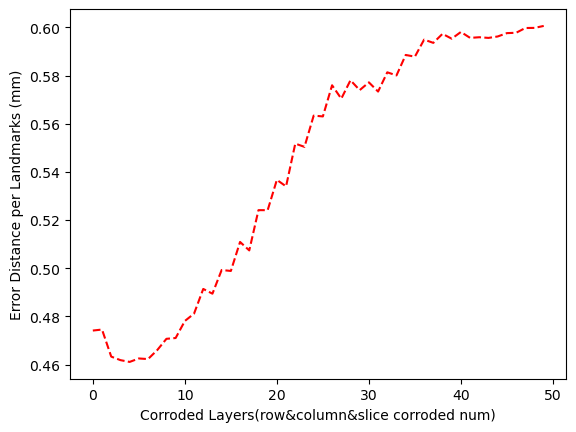

In [26]:
import matplotlib.pyplot as plt

err_dis = np.power(err_array, 0.5)
corroded_layers = np.arange(0, 50)

plt.plot(corroded_layers, err_dis, 'r--')

plt.xlabel('Corroded Layers(row&column&slice corroded num)')
plt.ylabel('Error Distance per Landmarks (mm)')
plt.show()

In [32]:
# find the indexes of the minimum value (the best precision)
min_value = np.min(err_array_15x15x15)
min_value_idx = np.argwhere(err_array_15x15x15==min_value)

print("min value: ", min_value)
print("index    : ", min_value_idx)

min value:  0.19410739839076996
index    :  [[ 3  1 14]]


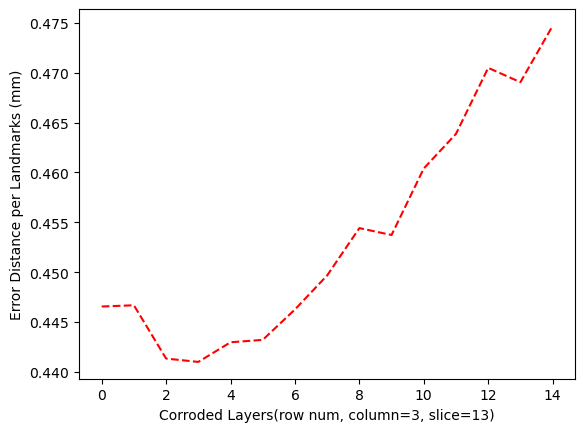

In [30]:
import matplotlib.pyplot as plt

err_dis = np.power(err_array_15x15x15, 0.5)
corroded_layers = np.arange(0, 15)

corroded_column_num = 3
corroded_slice_num = 13

plt.plot(corroded_layers, err_dis[:, corroded_column_num, corroded_slice_num], 'r--')

plt.xlabel(f'Corroded Layers(row num, column={corroded_column_num}, slice={corroded_slice_num})')
plt.ylabel('Error Distance per Landmarks (mm)')
plt.show()

In [71]:
# s = 0 # slice

def f(r, c, s=0):
    return err_array_15x15x15[r, c, s]

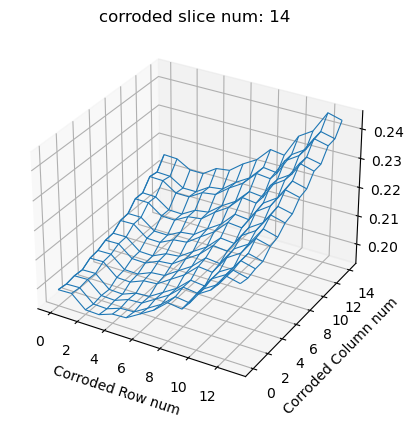

In [76]:
slice_num = 14

row = np.linspace(0, 13, 15).astype(int)
column = np.linspace(0, 14, 15).astype(int)

R, C = np.meshgrid(row, column)
E = f(R, C, s=slice_num)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(R, C, E, linewidths=0.8)
ax.set_title(f"corroded slice num: {slice_num}")
plt.xlabel("Corroded Row num")
plt.ylabel("Corroded Column num")
plt.show()

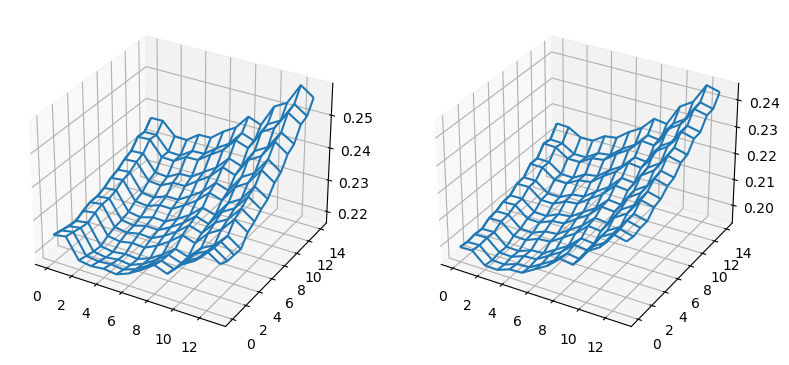

In [73]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from mpl_toolkits.mplot3d.axes3d import get_test_data


# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

row = np.linspace(0, 13, 15).astype(int)
column = np.linspace(0, 14, 15).astype(int)

R, C = np.meshgrid(row, column)
E1 = f(R, C, s=0)
E2 = f(R, C, s=14)

# =============
# First subplot
# =============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo

ax.plot_wireframe(R, C, E1)

# ==============
# Second subplot
# ==============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
ax.plot_wireframe(R, C, E2)

plt.show()

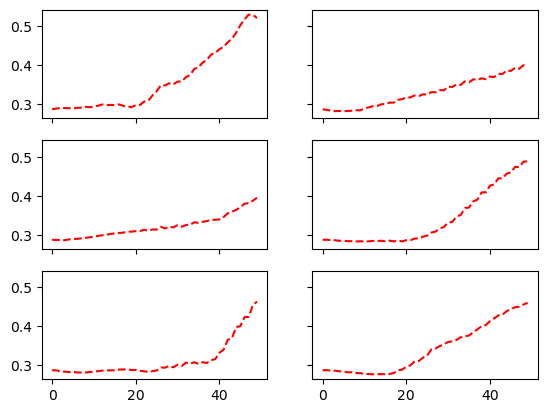

In [80]:
# Corrode 6 surfaces separately
from matplotlib import pyplot

fig, axs = pyplot.subplots(3, 2, sharex=True, sharey=True)

err_dis = np.power(err_array_50x6, 0.5)
corroded_layers = np.arange(0, 50)

# based on the Volume array
# Cut from start to Row ascending order
axs[0][0].plot(corroded_layers, err_dis[0], 'r--')
# Cut from end to Row descending order
axs[0][1].plot(corroded_layers, err_dis[1], 'r--')
# Cut from start to Column ascending order
axs[1][0].plot(corroded_layers, err_dis[2], 'r--')
# Cut from end to Column descending order
axs[1][1].plot(corroded_layers, err_dis[3], 'r--')
# Cut from start to Slice ascending order
axs[2][0].plot(corroded_layers, err_dis[4], 'r--')
# Cut from end to Slice descending order
axs[2][1].plot(corroded_layers, err_dis[5], 'r--')

pyplot.show()


## Meaning of the values in Volumes

## Meaning of the values in trained models' filters